In [4]:
import pandas as pd

In [5]:
weather = pd.read_csv('../data/weather-data.csv')
pool = pd.read_csv('../data/heimsoknir_i_sundlaugar_heild.csv')

# rename columns
pool = pool.rename(columns={'dagsetning':'date', 'timi_dags':'time_of_day','sundlaug': 'pool', 'fjoldi_gesta': 'visitors', 'ar': 'year', 'manudur': 'month', 'vikudagur': 'weekday', 'arstid': 'season',  'helgi': 'weekend'})



weather =weather.rename(columns={'Ár': 'year', 'Mánuður':'month', 'Meðalhiti (°C)': 'monthly_average_temp',	'Meðalhámarkshiti (°C)': 'monthly_max_temp',	'Meðallágmarkshiti (°C)': 'monthly_min_temp',	'Úrkoma (mm)':'monthly_rain', 'Meðalvindhraði (m/s)': 'monthly_average_windspeed',	'Sólskinsstundir (klst)':'monthly_hours_sunshine'})

months = ['Janúar', 'Febrúar', 'Mars', 'Apríl', 'Maí', 'Júní', 'Júlí', 'Ágúst', 'September', 'Október', 'Nóvember', 'Desember']

weather = weather[weather['month'] != 'Ársmeðaltal']
weather['month'] = weather['month'].apply(lambda x: months.index(x)+1).astype(int)

date = pd.to_datetime(weather[['year', 'month']].assign(DAY=1))
weather['year'] = date.dt.year

# make sure all columns are numeric
weather = weather.apply(pd.to_numeric, errors='ignore')

weather["monthly_average_temp"] = weather["monthly_average_temp"].str.replace(",", ".").astype(float)
weather["monthly_max_temp"] = weather["monthly_max_temp"].str.replace(",", ".").astype(float)
weather["monthly_min_temp"] = weather["monthly_min_temp"].str.replace(",", ".").astype(float)
weather["monthly_rain"] = weather["monthly_rain"].str.replace(",", ".").astype(float)
weather["monthly_average_windspeed"] = weather["monthly_average_windspeed"].str.replace(",", ".").astype(float)
weather["monthly_hours_sunshine"] = weather["monthly_hours_sunshine"].str.replace(",", ".").astype(float)


weather

,_id,year,month,monthly_average_temp,monthly_max_temp,monthly_min_temp,monthly_rain,monthly_average_windspeed,monthly_hours_sunshine
0,1,2001,1,1.0,3.4,-1.2,78.2,4.9,35.5
1,2,2001,2,-0.2,3.1,-3.0,80.8,5.7,91.8
2,3,2001,3,0.0,3.5,-2.8,24.4,3.7,126.0
3,4,2001,4,3.7,7.6,0.9,32.0,4.0,212.5
4,5,2001,5,6.6,9.8,4.5,87.1,4.2,130.6
...,...,...,...,...,...,...,...,...,...
202,203,2016,8,11.8,15.1,9.3,33.4,2.6,192.5
203,204,2016,9,8.7,12.0,6.1,59.3,3.2,135.0
204,205,2016,10,7.8,10.0,5.8,206.9,5.8,40.3
205,206,2016,11,3.5,5.6,1.6,127.4,4.6,18.1


In [6]:
# add column "date time"
time_span = pool['time_of_day'] # e.g. 12-13
time_of_day = time_span.map(lambda x: x.split('-')[1]) # e.g. 13
time_of_day = time_of_day.map(lambda x: x + ':00' if len(x) == 2 else '0' + x + ':00') # e.g. 13:00
time_of_day = time_of_day.map(lambda x: '00:00' if x=="24:00" else x) # 24:00 -> 00:00

date = pool['date'] # e.g. 2019-01-02
date = date.map(lambda x: x.split('-')) # e.g. ['2019', '01', '02']
date = date.map(lambda x: x[2] + '-' + x[1] + '-' + x[0]) # e.g. 02-01-2019

pool['date_time'] = date + ' ' + time_of_day
pool['date_time'] = pd.to_datetime(pool['date_time'], format='%d-%m-%Y %H:%M')

pool['unix_time'] = pool['date_time'].map(lambda x: x.timestamp())

pool['weekend'] = pool['date_time'].map(lambda x: x.weekday() >= 5).astype(bool)
pool['weekday'] = pool['date_time'].map(lambda x: x.weekday()).astype(int)
pool['month'] = pool['date_time'].map(lambda x: x.month).astype(int)
pool['year'] = pool['date_time'].map(lambda x: x.year).astype(int)
pool['season'] = pool['date_time'].map(lambda x: x.month % 12 // 3 + 1) # 1: winter, 2: spring, 3: summer, 4: fall

pool['hour'] = pool['date_time'].map(lambda x: x.hour).astype(int)

pool = pool.drop(columns=['date', 'time_of_day'])

pool

,pool,visitors,year,season,month,weekday,weekend,date_time,unix_time,hour
0,Grafarvogslaug,6,2019,3,8,0,False,2019-08-26 20:00:00,1.566850e+09,20
1,Grafarvogslaug,1,2019,3,8,0,False,2019-08-26 21:00:00,1.566853e+09,21
2,Árbæjarlaug,10,2019,3,8,1,False,2019-08-27 09:00:00,1.566896e+09,9
3,Árbæjarlaug,34,2019,3,8,1,False,2019-08-27 10:00:00,1.566900e+09,10
4,Árbæjarlaug,21,2019,3,8,1,False,2019-08-27 11:00:00,1.566904e+09,11
...,...,...,...,...,...,...,...,...,...,...
131389,Sundhöll Reykjavíkur,109,2023,3,6,0,False,2023-06-12 18:00:00,1.686593e+09,18
131390,Sundhöll Reykjavíkur,75,2023,3,6,0,False,2023-06-12 19:00:00,1.686596e+09,19
131391,Sundhöll Reykjavíkur,106,2023,3,6,0,False,2023-06-12 20:00:00,1.686600e+09,20
131392,Sundhöll Reykjavíkur,141,2023,3,6,0,False,2023-06-12 21:00:00,1.686604e+09,21


In [7]:
# merge dataframes
weather["month"] = weather["month"].astype(int)
weather["year"] = weather["year"].astype(int)
pool["month"] = pool["month"].astype(int)
pool["year"] = pool["year"].astype(int)


df = pd.merge(pool, weather, on=['year', 'month'])
df = df.drop(columns=['year', 'month', '_id'])

df


,pool,visitors,season,weekday,weekend,date_time,unix_time,hour,monthly_average_temp,monthly_max_temp,monthly_min_temp,monthly_rain,monthly_average_windspeed,monthly_hours_sunshine


In [8]:

# Grafarvogslaug
grafarvogslaug = pool[pool['pool'] == 'Grafarvogslaug']

# Árbæjarlaug
arbaejarlaug = pool[pool['pool'] == 'Árbæjarlaug']

# Breiðholtslaug
breidholtslaug = pool[pool['pool'] == 'Breiðholtslaug']

# Sundhöll Reykjavíkur
sundholl_reykjavikur = pool[pool['pool'] == 'Sundhöll Reykjavíkur']

# Vesturbæjarlaug
vesturbaejarlaug = pool[pool['pool'] == 'Vesturbæjarlaug']

# Laugardalslaug
laugardalslaug = pool[pool['pool'] == 'Laugardalslaug']


In [9]:
laugardalslaug

,pool,visitors,year,season,month,weekday,weekend,date_time,unix_time,hour
245,Laugardalslaug,1,2019,3,8,4,False,2019-08-30 12:00:00,1.567166e+09,12
246,Laugardalslaug,1,2019,3,8,4,False,2019-08-30 14:00:00,1.567174e+09,14
247,Laugardalslaug,1,2019,3,8,4,False,2019-08-30 15:00:00,1.567177e+09,15
248,Laugardalslaug,8,2019,3,8,4,False,2019-08-30 17:00:00,1.567184e+09,17
249,Laugardalslaug,16,2019,3,8,4,False,2019-08-30 18:00:00,1.567188e+09,18
...,...,...,...,...,...,...,...,...,...,...
131373,Laugardalslaug,119,2023,3,6,0,False,2023-06-12 19:00:00,1.686596e+09,19
131374,Laugardalslaug,104,2023,3,6,0,False,2023-06-12 20:00:00,1.686600e+09,20
131375,Laugardalslaug,181,2023,3,6,0,False,2023-06-12 21:00:00,1.686604e+09,21
131376,Laugardalslaug,60,2023,3,6,0,False,2023-06-12 22:00:00,1.686607e+09,22


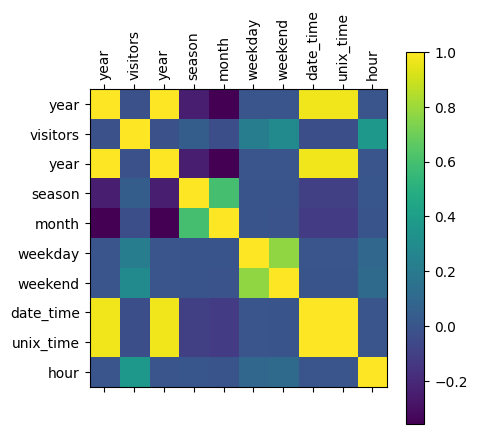

,year,visitors,year,season,month,weekday,weekend,date_time,unix_time,hour
year,1.000000,-0.022661,1.000000,-0.246169,-0.357995,0.000848,-0.000161,0.968456,0.968456,-0.000932
visitors,-0.022661,1.000000,-0.022661,0.045090,-0.030921,0.213571,0.290324,-0.031823,-0.031823,0.363596
year,1.000000,-0.022661,1.000000,-0.246169,-0.357995,0.000848,-0.000161,0.968456,0.968456,-0.000932
season,-0.246169,0.045090,-0.246169,1.000000,0.600545,-0.003023,-0.005921,-0.102557,-0.102557,0.007365
month,-0.357995,-0.030921,-0.357995,0.600545,1.000000,-0.005517,-0.010779,-0.114920,-0.114920,-0.006426
weekday,0.000848,0.213571,0.000848,-0.003023,-0.005517,1.000000,0.776750,-0.000560,-0.000560,0.089293
weekend,-0.000161,0.290324,-0.000161,-0.005921,-0.010779,0.776750,1.000000,-0.003030,-0.003030,0.113238
date_time,0.968456,-0.031823,0.968456,-0.102557,-0.114920,-0.000560,-0.003030,1.000000,1.000000,-0.002361
unix_time,0.968456,-0.031823,0.968456,-0.102557,-0.114920,-0.000560,-0.003030,1.000000,1.000000,-0.002361
hour,-0.000932,0.363596,-0.000932,0.007365,-0.006426,0.089293,0.113238,-0.002361,-0.002361,1.000000


In [10]:
# correlation matrix
import matplotlib.pyplot as plt

# grafarvogslaug
_grafarvogslaug = grafarvogslaug[['year', 'visitors', 'year', 'season', 'month', 'weekday', 'weekend', 'date_time', 'unix_time', 'hour']]
grafarvogslaug_corr = _grafarvogslaug.corr()



# Plot correlation matrix
plt.matshow(grafarvogslaug_corr)
plt.colorbar()
# Add labels to the plot
plt.xticks(range(len(grafarvogslaug_corr.columns)), grafarvogslaug_corr.columns, rotation='vertical')
plt.yticks(range(len(grafarvogslaug_corr.columns)), grafarvogslaug_corr.columns)
plt.show()

grafarvogslaug_corr

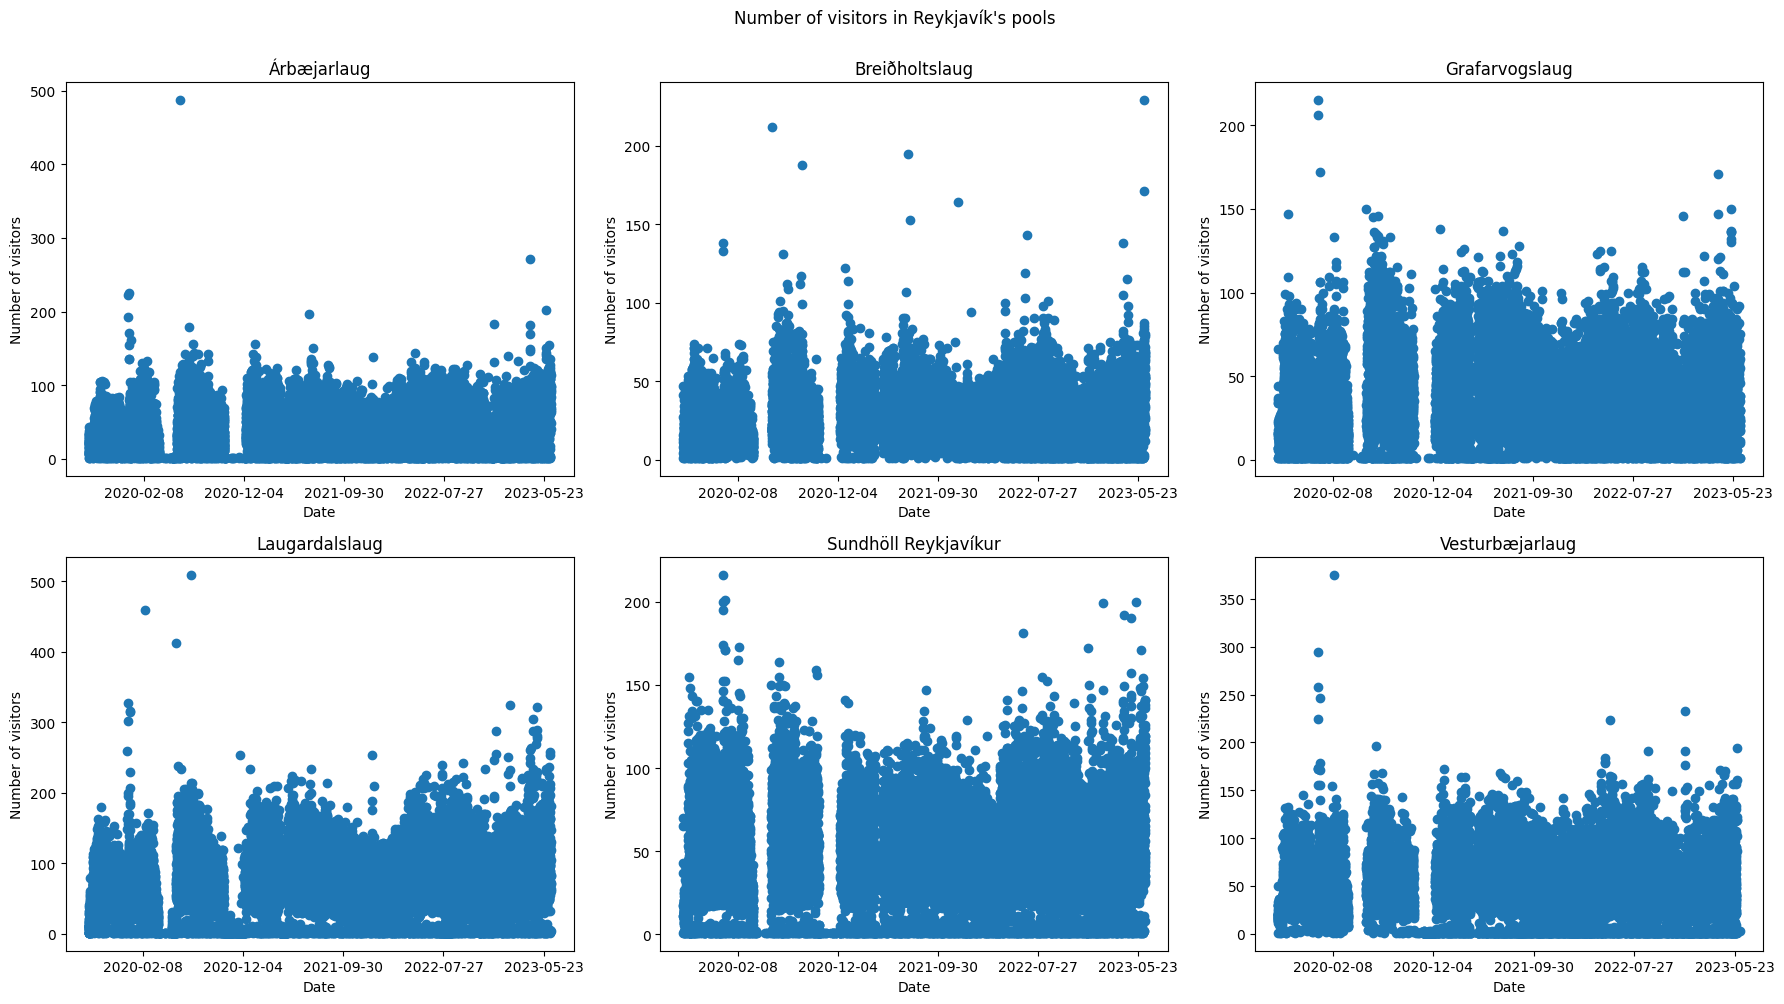

In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
maxn = MaxNLocator(nbins=6)

axs[0, 0].scatter(arbaejarlaug['date_time'], arbaejarlaug['visitors'])
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Number of visitors')
axs[0, 0].set_title('Árbæjarlaug')
axs[0, 0].xaxis.set_major_locator(maxn)

axs[0, 1].scatter(breidholtslaug['date_time'], breidholtslaug['visitors'])
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Number of visitors')
axs[0, 1].set_title('Breiðholtslaug')
axs[0, 1].xaxis.set_major_locator(maxn)

axs[0, 2].scatter(grafarvogslaug['date_time'], grafarvogslaug['visitors'])
axs[0, 2].set_xlabel('Date')
axs[0, 2].set_ylabel('Number of visitors')
axs[0, 2].set_title('Grafarvogslaug')
axs[0, 2].xaxis.set_major_locator(maxn)

axs[1, 0].scatter(laugardalslaug['date_time'], laugardalslaug['visitors'])
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Number of visitors')
axs[1, 0].set_title('Laugardalslaug')
axs[1, 0].xaxis.set_major_locator(maxn)

axs[1, 1].scatter(sundholl_reykjavikur['date_time'], sundholl_reykjavikur['visitors'])
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Number of visitors')
axs[1, 1].set_title('Sundhöll Reykjavíkur')
axs[1, 1].xaxis.set_major_locator(maxn)

axs[1, 2].scatter(vesturbaejarlaug['date_time'], vesturbaejarlaug['visitors'])
axs[1, 2].set_xlabel('Date')
axs[1, 2].set_ylabel('Number of visitors')
axs[1, 2].set_title('Vesturbæjarlaug')
axs[1, 2].xaxis.set_major_locator(maxn)

fig.suptitle("Number of visitors in Reykjavík's pools", y=1)

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

pretrain_data = pd.concat([grafarvogslaug, arbaejarlaug, breidholtslaug, sundholl_reykjavikur, vesturbaejarlaug])

finetune_data = laugardalslaug.copy()

combined_data = pd.concat([pretrain_data, finetune_data], ignore_index=True)

# one-hot encoding
# one_hot = pd.get_dummies(combined_data['pool'], prefix='pool')

# X = pd.concat([one_hot, combined_data[['weekday', 'weekend', 'hour']]], axis=1)
X = combined_data[['weekday', 'weekend', 'hour']]
y = combined_data['visitors']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.svm import SVR

pretrained_model, finetune_model = SVR(kernel='rbf'), SVR(kernel='rbf')
# pretrained_model.fit(X_train, y_train)

# score = pretrained_model.score(X_train, y_train)
# print('Pretraining score:', score)

In [14]:
# finetune_model.coef_ = pretrained_model.coef_
# finetune_model.intercept_ = pretrained_model.intercept_

X_finetune = finetune_data[['weekday', 'weekend', 'hour']]
y_finetune = finetune_data['visitors']

X_finetune_train, X_finetune_test, y_finetune_train, y_finetune_test = train_test_split(X_finetune, y_finetune, test_size=0.2, random_state=42)

finetune_model.fit(X_train, y_train)

score = finetune_model.score(X_train, y_train)
print('Finetuning score:', score)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = finetune_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

Mean Squared Error: 879.9002215094948
R-squared Score: 0.10088147434270212


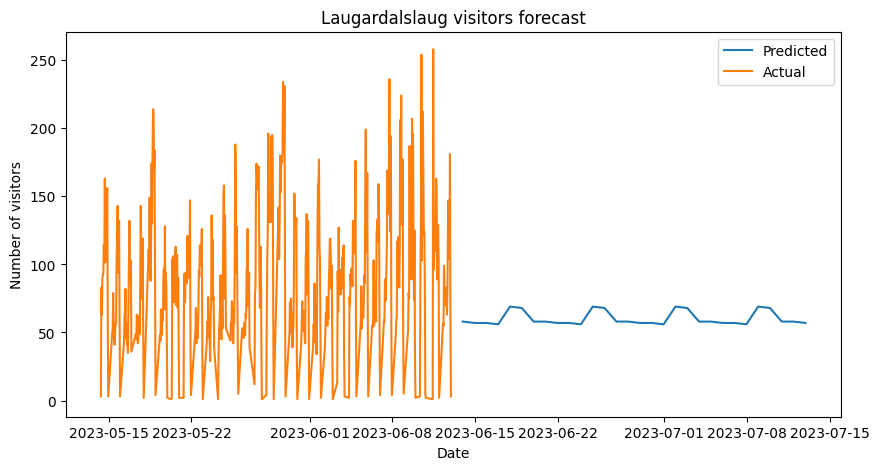

In [ ]:
# forecast next 30 days
import datetime
import numpy as np

# get last date
last_date = laugardalslaug['date_time'].iloc[-1]

# create next 30 days
next_30_days = []
for i in range(1, 31):
    next_30_days.append(last_date + datetime.timedelta(days=i))

# create dataframe
next_30_days = pd.DataFrame(next_30_days, columns=['date_time'])

# add weekday, weekend and hour
next_30_days['weekday'] = next_30_days['date_time'].dt.weekday
next_30_days['weekend'] = next_30_days['weekday'].apply(lambda x: 1 if x > 4 else 0)
next_30_days['hour'] = next_30_days['date_time'].dt.hour

# make predictions
next_30_days['visitors'] = finetune_model.predict(next_30_days[['weekday', 'weekend', 'hour']])
next_30_days['visitors'] = next_30_days['visitors'].apply(lambda x: 0 if x < 0 else x)
next_30_days['visitors'] = next_30_days['visitors'].apply(lambda x: np.round(x))

# Get the actual visitors data for the previous 30 days
actual_data = laugardalslaug[laugardalslaug['date_time'] >= (last_date - datetime.timedelta(days=30))]

# Plot predictions and actual data
plt.figure(figsize=(10, 5))
plt.plot(next_30_days['date_time'], next_30_days['visitors'], label='Predicted')
plt.plot(actual_data['date_time'], actual_data['visitors'], label='Actual')
plt.title('Laugardalslaug visitors forecast')
plt.xlabel('Date')
plt.ylabel('Number of visitors')
plt.legend()
plt.show()
